In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
import FinanceDataReader as fdr

In [52]:
samsung = fdr.DataReader('008770')

In [55]:
ford = fdr.DataReader('008770','2017-01-02','2022-07-08')

In [60]:
ford.index

In [62]:
ford.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-04', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-08'],
              dtype='datetime64[ns]', name='Date', length=1602, freq=None)

In [3]:
Stock_code = '008770'
stock = fdr.DataReader(Stock_code, '2017-01-02','2022-07-08')

In [95]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,47550,47700,47150,47450,204335,-0.014538
2017-01-03,47400,47900,47200,47200,179991,-0.005269
2017-01-04,47050,47600,47050,47500,141656,0.006356
2017-01-05,47600,48600,47250,48400,308502,0.018947
2017-01-06,48400,48550,48000,48550,182143,0.003099


In [15]:
stock.index

DatetimeIndex(['1998-05-08', '1998-05-09', '1998-05-11', '1998-05-12',
               '1998-05-13', '1998-05-14', '1998-05-15', '1998-05-16',
               '1998-05-18', '1998-05-19',
               ...
               '2022-06-29', '2022-06-30', '2022-07-01', '2022-07-04',
               '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08',
               '2022-07-11', '2022-07-12'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [16]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

Text(0, 0.5, 'price')

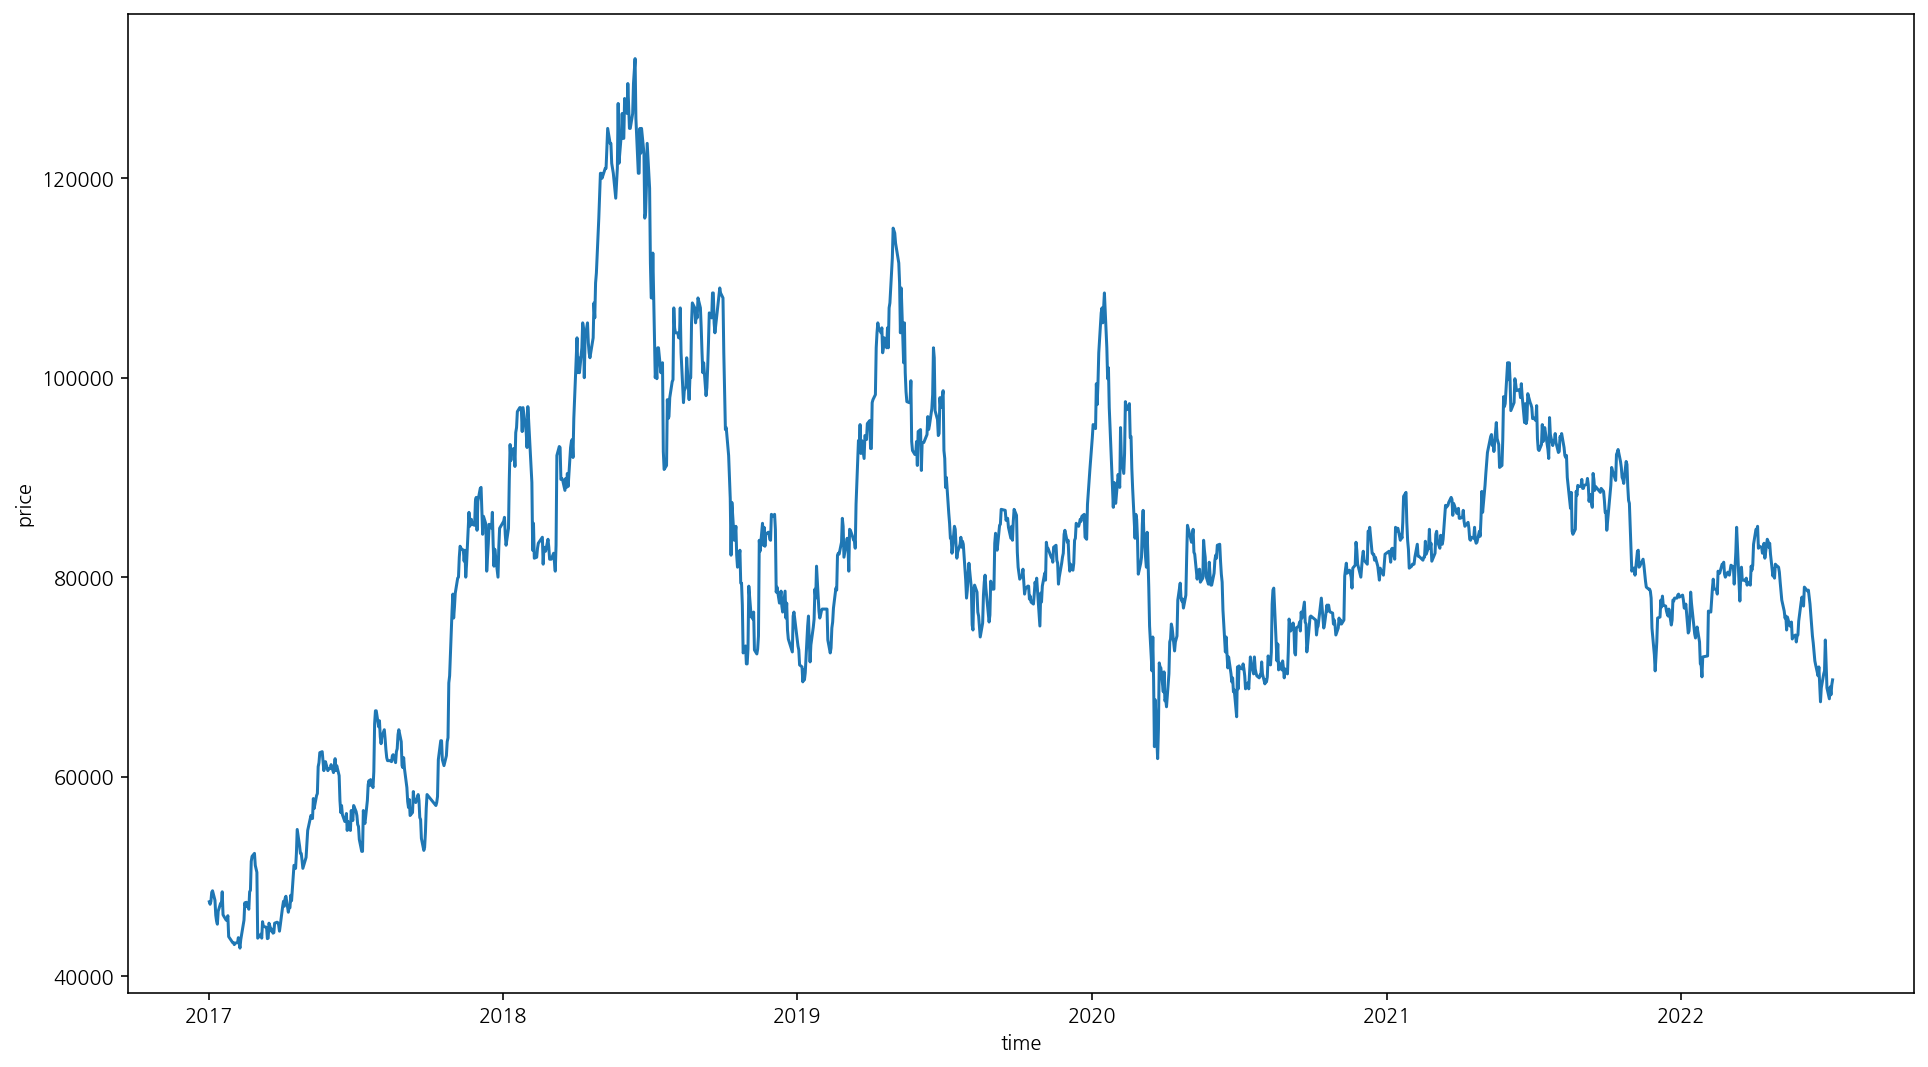

In [96]:
plt.figure(figsize=(16,9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.05800335, 0.04745763, 0.05844907, 0.05213004, 0.02869511],
       [0.05633017, 0.04971751, 0.05902778, 0.04932735, 0.02165778],
       [0.0524261 , 0.04632768, 0.05729167, 0.05269058, 0.01057595],
       ...,
       [0.29949805, 0.29830508, 0.29861111, 0.28475336, 0.02365878],
       [0.29503625, 0.29491525, 0.30555556, 0.29596413, 0.        ],
       [0.30284439, 0.3039548 , 0.31365741, 0.30156951, 0.00519359]])

In [5]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)


In [8]:
x_train.shape, y_train.shape


((1084, 4), (1084,))

In [9]:
x_test.shape, y_test.shape


((272, 4), (272,))

In [10]:
x_train


,Open,High,Low,Volume
0,0.058003,0.047458,0.058449,0.028695
1,0.056330,0.049718,0.059028,0.021658
2,0.052426,0.046328,0.057292,0.010576
3,0.058561,0.057627,0.059606,0.058808
4,0.067485,0.057062,0.068287,0.022280
...,...,...,...,...
1079,0.621863,0.632768,0.633102,0.238107
1080,0.620747,0.628249,0.634259,0.116091
1081,0.633017,0.672316,0.648148,0.316450
1082,0.659788,0.655367,0.662037,0.189195


In [47]:
import test11 as ts
import imp
imp.reload(ts)

<module 'test11' from 'c:\\Users\\김성휘\\Desktop\\공모전데이터\\test11.py'>

In [50]:
df = ts.LSTM('008770')

In [51]:
df

,Open,High,Low,Volume
0,0.011499,0.010920,0.011375,0.016849
1,0.011156,0.010583,0.011450,0.017246
2,0.009789,0.009713,0.010183,0.019329
3,0.009109,0.009915,0.009275,0.025165
4,0.009584,0.010245,0.009973,0.019422
...,...,...,...,...
4795,0.426128,0.420217,0.432385,0.044291
4796,0.422472,0.420217,0.426386,0.051167
4797,0.422472,0.420935,0.433135,0.030822
4798,0.427590,0.425246,0.431635,0.048837


In [71]:
ho = pd.read_csv("./csv/호텔신라공매도거래1722.csv", encoding='CP949')
ho2 = pd.read_csv("./csv/호텔신라공매도잔고1722.csv", encoding='CP949')

In [73]:
ho2.drop(["수량_상장주식수","금액_공매도잔고금액","금액_시가총액"], axis=1, inplace=True)

In [74]:
ho2

,일자,수량_공매도잔고수량,비중
0,2022/07/08,2841061,7.24
1,2022/07/07,2852905,7.27
2,2022/07/06,2851481,7.27
3,2022/07/05,2859280,7.29
4,2022/07/04,2896948,7.38
...,...,...,...
1351,2017/01/06,2741912,6.99
1352,2017/01/05,2788550,7.10
1353,2017/01/04,2820774,7.19
1354,2017/01/03,2828097,7.21


In [76]:
ho.drop(["수량_공매도거래량_업틱룰적용","수량_공매도거래량_업틱룰예외","수량_거래량","금액_공매도거래대금_업틱룰적용","금액_공매도거래대금_업틱룰예외","금액_거래대금"], axis=1, inplace=True)

In [77]:
ho_total = pd.merge(ho,ho2,on="일자", how="inner")

In [83]:
ho_total.sort_index( ascending=False, ignore_index=True)

,일자,수량_공매도거래량_전체,수량_비중,금액_공매도거래대금_전체,금액_비중,수량_공매도잔고수량,비중
0,2017/01/02,50295,24.61,2378629100,24.58,2795914,7.12
1,2017/01/03,51307,28.51,2427997250,28.49,2828097,7.21
2,2017/01/04,30603,21.60,1449158200,21.61,2820774,7.19
3,2017/01/05,23029,7.46,1108885350,7.45,2788550,7.10
4,2017/01/06,13614,7.47,658551250,7.48,2741912,6.99
...,...,...,...,...,...,...,...
1351,2022/07/04,48680,19.38,3293571100,19.39,2896948,7.38
1352,2022/07/05,29358,17.39,2020524800,17.37,2859280,7.29
1353,2022/07/06,29013,15.52,1997046500,15.49,2851481,7.27
1354,2022/07/07,13576,12.92,937263100,12.92,2852905,7.27


In [84]:
ho_total.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355],
           dtype='int64', length=1356)

In [87]:
ho_total["일자"] = pd.to_datetime(ho_total["일자"])

In [90]:
ho_total

,일자,수량_공매도거래량_전체,수량_비중,금액_공매도거래대금_전체,금액_비중,수량_공매도잔고수량,비중
0,2022-07-08,6120,4.97,427100100,4.97,2841061,7.24
1,2022-07-07,13576,12.92,937263100,12.92,2852905,7.27
2,2022-07-06,29013,15.52,1997046500,15.49,2851481,7.27
3,2022-07-05,29358,17.39,2020524800,17.37,2859280,7.29
4,2022-07-04,48680,19.38,3293571100,19.39,2896948,7.38
...,...,...,...,...,...,...,...
1351,2017-01-06,13614,7.47,658551250,7.48,2741912,6.99
1352,2017-01-05,23029,7.46,1108885350,7.45,2788550,7.10
1353,2017-01-04,30603,21.60,1449158200,21.61,2820774,7.19
1354,2017-01-03,51307,28.51,2427997250,28.49,2828097,7.21


In [91]:
ho_total.columns = ["Date", "공매도거래량", "공매도거래량비중", "공매도거래대금", "공매도거래대금비중", "공매도잔고수량", "공매도잔고비중"]

In [92]:
ho_total

,Date,공매도거래량,공매도거래량비중,공매도거래대금,공매도거래대금비중,공매도잔고수량,공매도잔고비중
0,2022-07-08,6120,4.97,427100100,4.97,2841061,7.24
1,2022-07-07,13576,12.92,937263100,12.92,2852905,7.27
2,2022-07-06,29013,15.52,1997046500,15.49,2851481,7.27
3,2022-07-05,29358,17.39,2020524800,17.37,2859280,7.29
4,2022-07-04,48680,19.38,3293571100,19.39,2896948,7.38
...,...,...,...,...,...,...,...
1351,2017-01-06,13614,7.47,658551250,7.48,2741912,6.99
1352,2017-01-05,23029,7.46,1108885350,7.45,2788550,7.10
1353,2017-01-04,30603,21.60,1449158200,21.61,2820774,7.19
1354,2017-01-03,51307,28.51,2427997250,28.49,2828097,7.21


In [97]:
hosin = pd.merge(stock,ho_total, on="Date", how="inner")

In [98]:
hosin

,Date,Open,High,Low,Close,Volume,Change,공매도거래량,공매도거래량비중,공매도거래대금,공매도거래대금비중,공매도잔고수량,공매도잔고비중
0,2017-01-02,47550,47700,47150,47450,204335,-0.014538,50295,24.61,2378629100,24.58,2795914,7.12
1,2017-01-03,47400,47900,47200,47200,179991,-0.005269,51307,28.51,2427997250,28.49,2828097,7.21
2,2017-01-04,47050,47600,47050,47500,141656,0.006356,30603,21.60,1449158200,21.61,2820774,7.19
3,2017-01-05,47600,48600,47250,48400,308502,0.018947,23029,7.46,1108885350,7.45,2788550,7.10
4,2017-01-06,48400,48550,48000,48550,182143,0.003099,13614,7.47,658551250,7.48,2741912,6.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,2022-07-04,68700,69300,66500,67800,251171,-0.015965,48680,19.38,3293571100,19.39,2896948,7.38
1352,2022-07-05,68000,69800,67900,69000,168847,0.017699,29358,17.39,2020524800,17.37,2859280,7.29
1353,2022-07-06,69200,69900,67900,68200,186913,-0.011594,29013,15.52,1997046500,15.49,2851481,7.27
1354,2022-07-07,68800,69600,68500,69200,105071,0.014663,13576,12.92,937263100,12.92,2852905,7.27


In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume','공매도거래량', '공매도거래량비중', '공매도거래대금', '공매도거래대금비중', '공매도잔고수량','공매도잔고비중']
# 스케일 후 columns
scaled = scaler.fit_transform(hosin[scale_cols])
scaled

array([[0.05800335, 0.04745763, 0.05844907, ..., 0.49416968, 0.61753162,
        0.61722913],
       [0.05633017, 0.04971751, 0.05902778, ..., 0.57277845, 0.62481265,
        0.62522202],
       [0.0524261 , 0.04632768, 0.05729167, ..., 0.43445919, 0.6231559 ,
        0.62344583],
       ...,
       [0.29949805, 0.29830508, 0.29861111, ..., 0.31141938, 0.630103  ,
        0.63055062],
       [0.29503625, 0.29491525, 0.30555556, ..., 0.2597507 , 0.63042517,
        0.63055062],
       [0.30284439, 0.3039548 , 0.31365741, ..., 0.09991958, 0.6277456 ,
        0.62788632]])

In [100]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [101]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [11]:
import tensorflow as tf

In [12]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [13]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [14]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [15]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [21]:
import tensorflow as tf

In [17]:
model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [18]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [19]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                            save_weights_only=True, 
                            save_best_only=True, 
                            monitor='val_loss', 
                            verbose=1)

In [20]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
34/34 [==============================] - 2s 18ms/step - loss: 0.0962 - mse: 0.1923 - val_loss: 0.0441 - val_mse: 0.0881

Epoch 00001: val_loss improved from inf to 0.04406, saving model to tmp\ckeckpointer.ckpt
Epoch 2/50
34/34 [==============================] - 0s 7ms/step - loss: 0.0195 - mse: 0.0389 - val_loss: 0.0030 - val_mse: 0.0059

Epoch 00002: val_loss improved from 0.04406 to 0.00296, saving model to tmp\ckeckpointer.ckpt
Epoch 3/50
34/34 [==============================] - 0s 6ms/step - loss: 0.0041 - mse: 0.0082 - val_loss: 0.0011 - val_mse: 0.0023

Epoch 00003: val_loss improved from 0.00296 to 0.00114, saving model to tmp\ckeckpointer.ckpt
Epoch 4/50
34/34 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0050 - val_loss: 7.7489e-04 - val_mse: 0.0015

Epoch 00004: val_loss improved from 0.00114 to 0.00077, saving model to tmp\ckeckpointer.ckpt
Epoch 5/50
34/34 [==============================] - 0s 8ms/step - loss: 0.0019 - mse: 0.0038 - val_

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 133: invalid start byte

In [22]:
model.load_weights(filename)

In [23]:
pred = model.predict(test_data)

In [24]:
pred.shape

(252, 1)

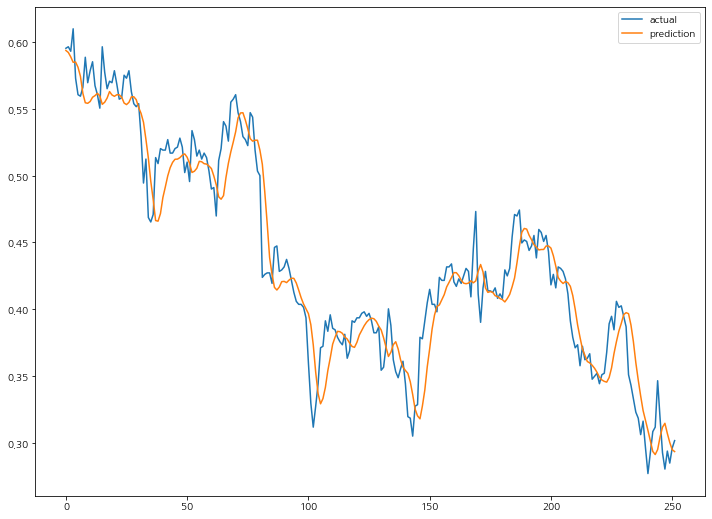

In [25]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()